aradığınız şarkıyı yazınız:LALA


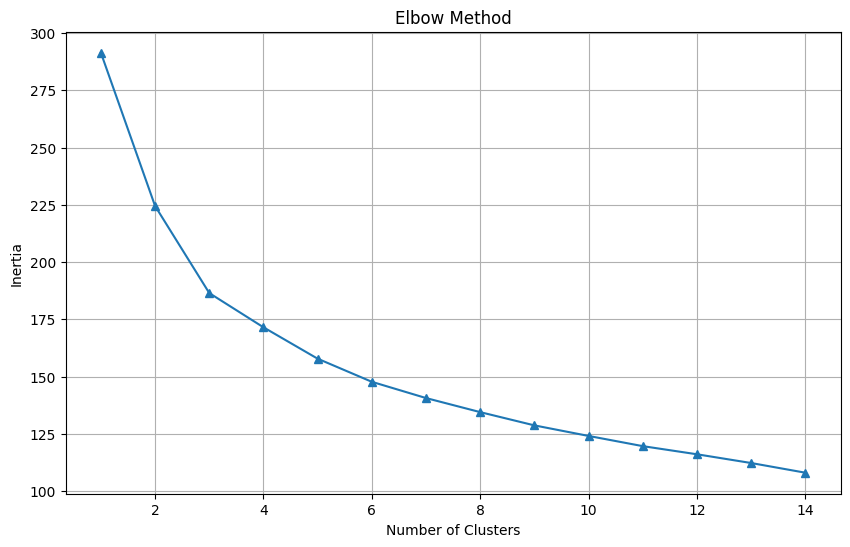

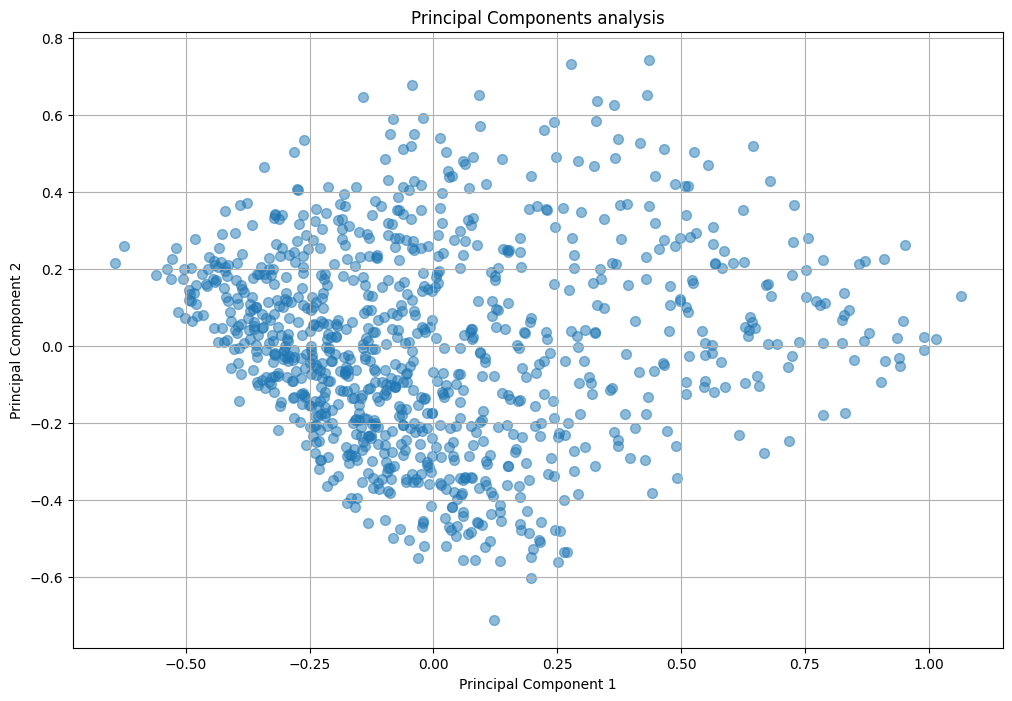

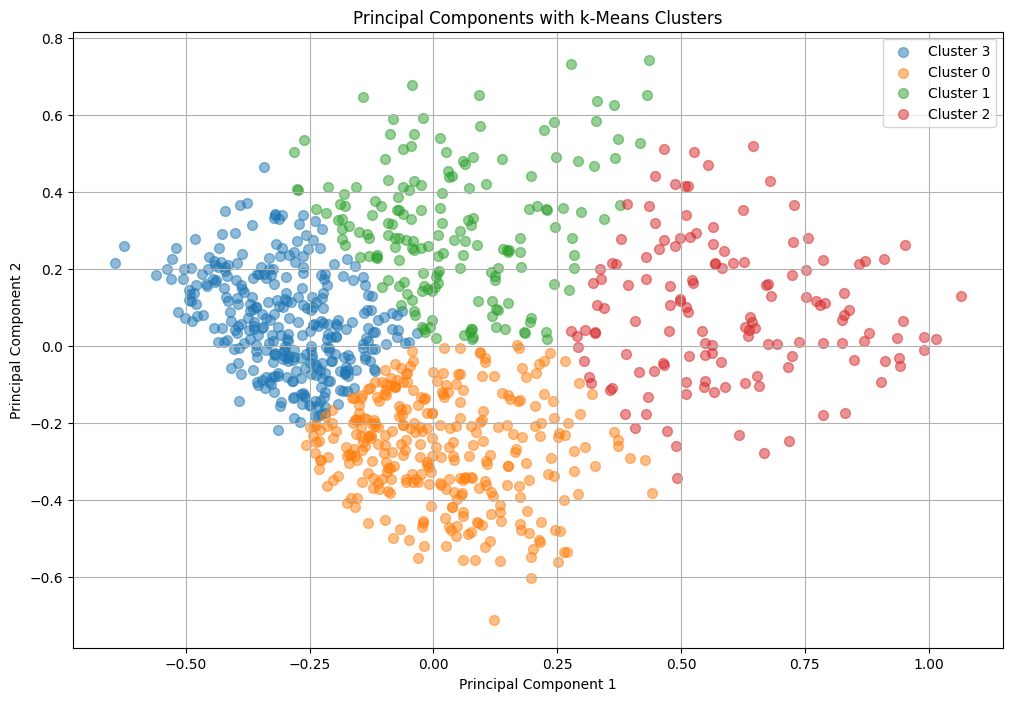

maalesef aradığınız şarkı bizde yok.
belki bu şarkılar ilginizi çekebilir.


['SPIT IN MY FACE!',
 'Besos Moja2',
 'En La De Ella',
 'Marisola - Remix',
 'Adore You']

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

spotify = pd.read_csv('Popular_Spotify_Songs.csv', encoding='ISO-8859-1')
fizy = pd.read_csv('fizy.csv', encoding='ISO-8859-1')
song_name=input("aradığınız şarkıyı yazınız:")

# Bunları normalize edeceğiz
scaler = MinMaxScaler()
normalized = scaler.fit_transform(spotify[np.recommendation_features])
normalized_df = pd.DataFrame(normalized, columns=np.recommendation_features)

inertia_values = []
cluster_range = range(1, 15)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_df)
    inertia_values.append(kmeans.inertia_)

# en uygun cluster sayısını belirlemek için "dirsek" metodunu kullanıyoruz
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

#bizim öneri özelliklerimiz çok boyutlu bir uzayda ve "PCA" metodu ile onu iki boyutlu uzaya dönüştüreceğiz.

pca = PCA(n_components=2)
principal = pca.fit_transform(normalized_df)
pca_df=pd.DataFrame(data=principal,columns=['PC1','PC2'])

plt.figure(figsize=(12,8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=50, alpha=0.5)
plt.title('Principal Components analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
#k-means algoritması ile öbeklere ayırdık
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(principal)
#bunu bir data frame dönüştürdük
pca_df = pd.DataFrame(data=principal, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters
#burada da gruplandırdığımız data framein grfaiğini çizdik
plt.figure(figsize=(12, 8))
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], s=50, label=f'Cluster {cluster}', alpha=0.5)
plt.title('Principal Components with k-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=6, n_jobs=-1)

knn_model.fit(normalized_df)

def get_recommendations_knn_song(song_name, num_recommendations=5):
    # şarkının datasetinde olup olmadığını kontrol ediyoruz
    if song_name not in fizy['track_name'].values:
        # şarkının özelliklerini alıyoruz
        song_data = normalized_df[spotify['track_name'] == song_name]

        # knn modeli ile en çok benzer şarkıları buluyoruz
        distances, indices = knn_model.kneighbors(song_data, n_neighbors=num_recommendations+1)

        # ençok benzer şarkıların sadece isimlerini alıyoruz.
        recommended_songs = spotify['track_name'].iloc[indices[0][1:]].tolist()
        print("maalesef aradığınız şarkı bizde yok.")
        print("belki bu şarkılar ilginizi çekebilir.")
        return recommended_songs

sample_song = song_name
test_recommendations_song = get_recommendations_knn_song(sample_song, 5)
test_recommendations_song